In [154]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-data/Iris.csv


In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [156]:
df = pd.read_csv('/kaggle/input/iris-data/Iris.csv')
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [157]:
df.shape , df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


((150, 6), None)

In [158]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [159]:
df.isnull().sum().any

<bound method NDFrame._add_numeric_operations.<locals>.any of Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64>

In [160]:
df.duplicated().any()

False

In [161]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [162]:
df.drop(['Id'], inplace = True, axis =1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [163]:
#colummn names in the list form.
df.columns.tolist()


['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

[Text(0.5, 0, 'sepal_length'),
 Text(0, 0.5, 'sepal_width'),
 Text(0.5, 1.0, 'lenth vs width')]

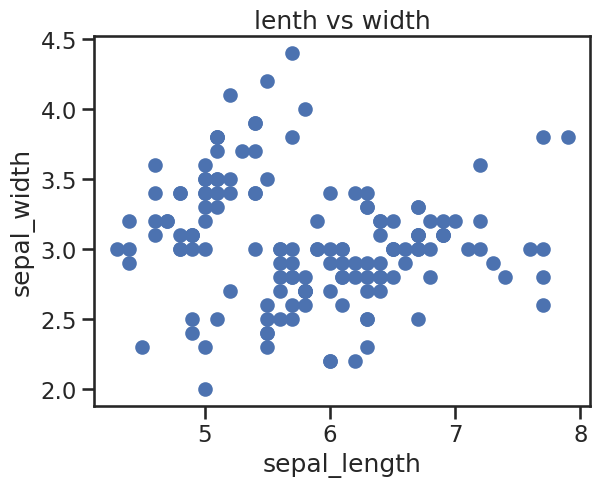

In [164]:
#creating a scatter plot using matplotlib
ax= plt.axes()

ax.scatter(df.SepalLengthCm, df.SepalWidthCm)
ax.set(xlabel = 'sepal_length',
      ylabel = 'sepal_width',
      title = 'lenth vs width')

array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

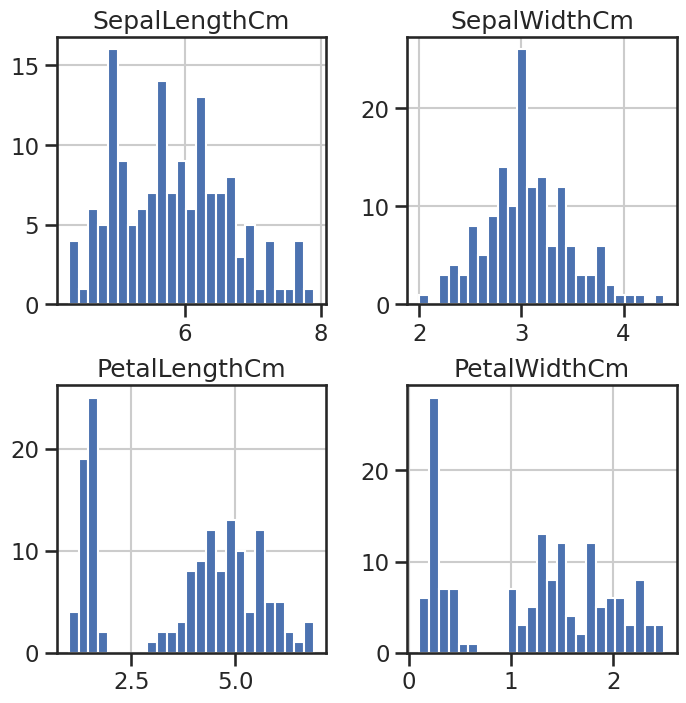

In [165]:
df.hist(bins= 25, figsize = (8,8))


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


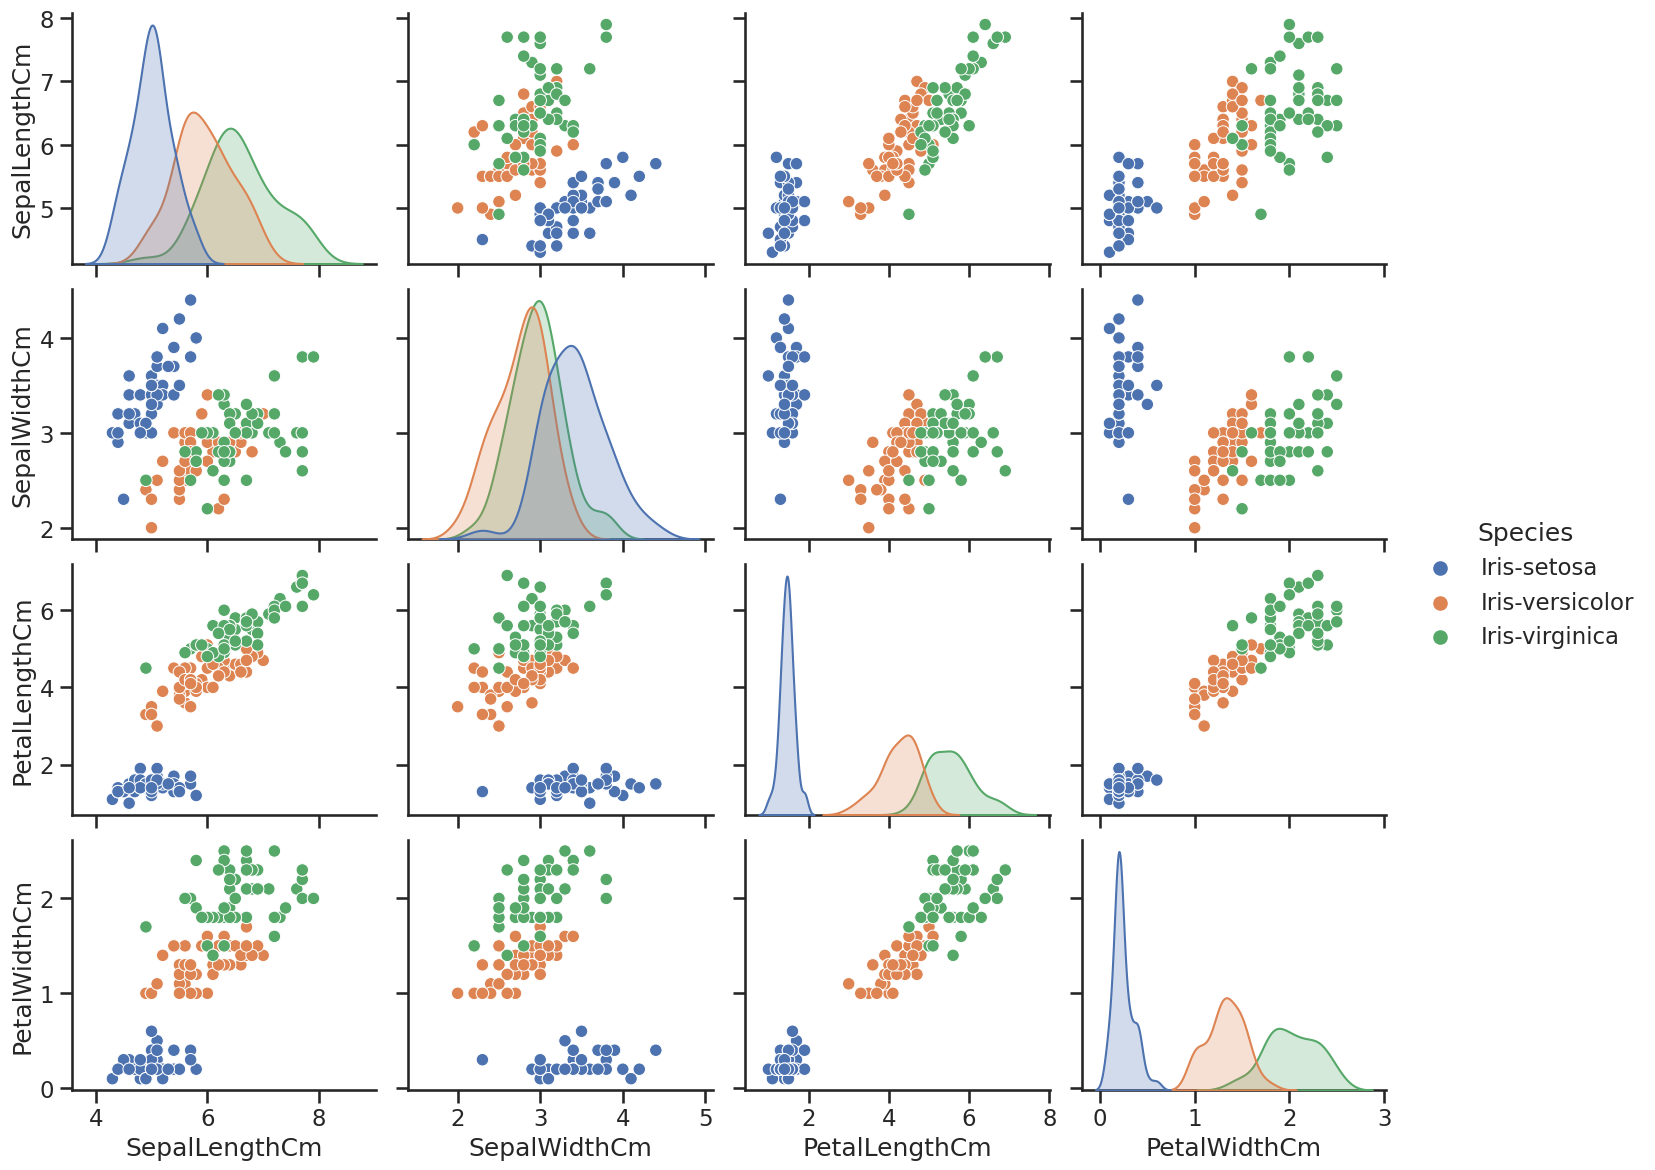

In [166]:
#pairplot woth seaborn
# Create a Matplotlib figure


# Show the figure
sns.set_context('talk')
sns.pairplot(df, hue='Species', height=3, aspect=1.2) ;
plt.show()

In [167]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

Le = LabelEncoder()
df['Species'] = Le.fit_transform(df['Species'])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [168]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [169]:
X= df.drop('Species', axis = 1)
Y = df['Species']
X,Y

(     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 0              5.1           3.5            1.4           0.2
 1              4.9           3.0            1.4           0.2
 2              4.7           3.2            1.3           0.2
 3              4.6           3.1            1.5           0.2
 4              5.0           3.6            1.4           0.2
 ..             ...           ...            ...           ...
 145            6.7           3.0            5.2           2.3
 146            6.3           2.5            5.0           1.9
 147            6.5           3.0            5.2           2.0
 148            6.2           3.4            5.4           2.3
 149            5.9           3.0            5.1           1.8
 
 [150 rows x 4 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 145    2
 146    2
 147    2
 148    2
 149    2
 Name: Species, Length: 150, dtype: int64)

In [170]:

X_train , X_test, Y_train, Y_test = train_test_split( X, Y , test_size = 0.2, random_state = 2)
X.shape, X_train.shape, X_test.shape

((150, 4), (120, 4), (30, 4))

In [171]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [172]:
y_pred = dtc.predict(X_test)
accuracy_score(y_pred, Y_test)

0.9333333333333333

In [173]:
r1 = recall_score(y_pred, Y_test,  average='weighted')
print(f'recall score is {r1}')

p1 = precision_score(y_pred, Y_test, average='weighted')
print(f'recall score is {p1}')

f1 = f1_score(y_pred, Y_test,average='weighted' )
print(f'recall score is {f1}')

cl = classification_report(y_pred, Y_test)
print(f'classification_report:\n\n {cl}')

recall score is 0.9333333333333333
recall score is 0.9333333333333333
recall score is 0.9333333333333333
classification_report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.88      0.88         8
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



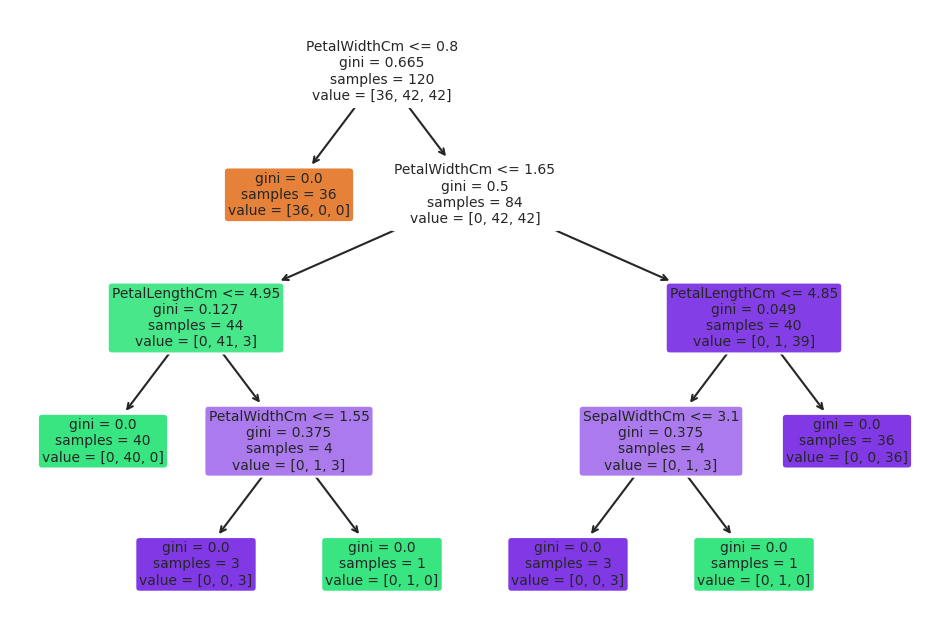

In [174]:
from sklearn import tree
plt.figure(figsize=(12, 8))
tree.plot_tree(dtc, filled=True, feature_names= ['SepalLengthCm', 'SepalWidthCm', 
                                                 'PetalLengthCm', 'PetalWidthCm'], rounded=True, fontsize=10)
plt.show()


In [175]:
encode = pd.DataFrame({'Species': ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], 'Encoded' : [0,1,2]})
encode

,Species,Encoded
0,Iris-setosa,0
1,Iris-versicolor,1
2,Iris-virginica,2


In [176]:
encode.set_index('Species')

,Encoded
Species,
Iris-setosa,0
Iris-versicolor,1
Iris-virginica,2


In [177]:
# Take new user input for prediction
Sepal_Length = input('Enter the sepal lenth :')
Sepal_Width = input('Enter the sepal width :')
Petal_Length = input('Enter the petal length :')
Petal_Width = input('Enter the petal width :')
new_input = pd.DataFrame({'SepalLengthCm': [Sepal_Length], 'SepalWidthCm': [Sepal_Width], 
                          'PetalLengthCm': [Petal_Length], 'PetalWidthCm': [Petal_Width]})

# Use the trained pipeline to make predictions on the input
predicted_rating = dtc.predict(new_input)
pred_2 = encode[encode['Encoded']== predicted_rating[0]]['Species'].item()

print("Predicted Species is", pred_2)

Enter the sepal lenth : 6.8
Enter the sepal width : 4.5
Enter the petal length : 3.4
Enter the petal width : 2.3


Predicted Species is Iris-versicolor


In [178]:
import pickle
pickle.dump(dtc, open('decisionTree.pkl', 'wb'))


In [179]:
model = pickle.load(open('decisionTree.pkl', 'rb'))
model.score(X_test, Y_test)

0.9333333333333333